Introduction to Regression with Neural Networks in TensorFlow

THere are many definitions for a regression problem but in our case, we're going to simplify it:
predicting a numerical variable based on some other combination of variable, even shorter...predicting a number.

In [1]:
#Import TensorFlow

import tensorflow as tf

print(tf.__version__)



2.5.0


Creating data to view and fit


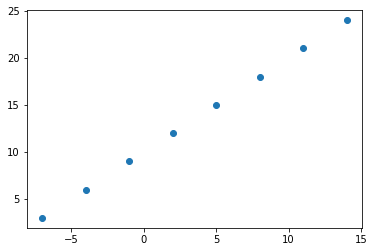

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#Create Labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize It
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Inputs and Outputs shape




In [4]:
#Create a demo tensor for ou housing price prediction prices

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2021-07-11 08:57:32.176704: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
#Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling in TensorFlow

1. creating a model - define the inputs and output layes, as well as hidden layers of a deep learning model.

2. Compiling a model - define the loss function ( in other words, the function which tells out model how wrong it is) and the optimizer (tell our model how to improve the patterns its learning) and evalutation metrics
(what we can use to interpret the performance of out model).

3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [10]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a mode using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean abolute error which is on average how wrong our model is.output_shape#
                optimizer= tf.keras.optimizers.SGD(), #sgd is short for stochastic gradiant descent, tells how to improve)
                metrics=["mae"])
#3. Fit the model
model.fit(X,y,epochs=5)

2021-07-11 08:57:32.617093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1/1 [==============================] - 0s 199ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
#Try and make a prediciton
y_pred = model.predict([20.0])
y_pred

array([[14.9512005]], dtype=float32)

In [13]:
y_pred + 14

array([[28.9512]], dtype=float32)

##Improve our model

We can improve out model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on a more data (give the model more examples to learn from).

In [14]:
#Lets rebuild the model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 195ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594

In [15]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
#Let's see if our model's prediction has improved...

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:

# 1. Rebuilding model again!!!

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1, activation=None)
])

# 2.Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])

# 3. Fit the model

model.fit(X,y,epochs=300)

Epoch 1/300


/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


1/1 [==============================] - 0s 330ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/300
1/1 [=====

In [18]:
model.predict([17.0])

array([[26.91077]], dtype=float32)

In [19]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Evaluating a model's performance

In practice, a typical workflow you'll gogo through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.. there are 3 words to memorize:
Visualize, Visualize, Viualize:

* The data - what data are we working with? What does it look like?

* The model itself - what does our model look like?

* The Training of the model - how does the model perform while it learns?

* The prediction of the model - How do the predioctions of a model line up against the ground truth (the original labels)?

In [20]:
#Make a bigger dataset

X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#Make labels for the dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

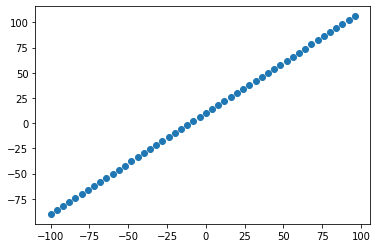

In [22]:
#Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.

* Validation set - the model gets tuned on this data, which is typicaly 10-15% of the data available

Test set - The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data availablie.


In [23]:
#Check the length of how many samples we have

len(X)

50

In [24]:
#Split the data into rain and test sets

X_train = X[:40] #First 40 are training samples (80% of data)

y_train = y[:40]

X_test = X[40:] # last 10 are testing amples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

Now that we've got our data in training and test sets....let's visualize it again!




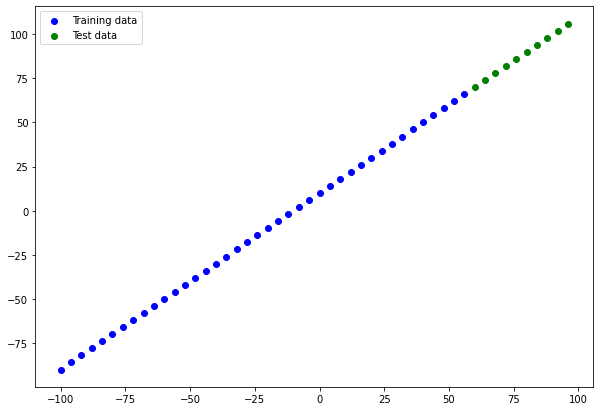

In [25]:
plt.figure(figsize=(10,7))

#plot training data in blue

plt.scatter(X_train, y_train, c = "b", label= "Training data")
#Plot Test data in Green
plt.scatter(X_test, y_test, c = "g", label = "Test data") #Be able to predict on this data
#Show a legend
plt.legend();

In [26]:
#Create model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model

#model.fit(X_train, y_train, epochs=100)

In [27]:
#Visualize the model

#model.summary()

In [28]:
#LEt's create a model which builds automatically by defining the input_shape argument in the first layer.
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
                                                   ], name = "Model_1")
#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])


In [29]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - these parameter aren't updated during training( this is typical when you bring in already learned patterns or parameters from other models during
**Transfer Learning**).


In [30]:
##Fit model
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 35.8233 - mae: 35.8233
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 21.7558 - mae: 21.7558
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9130 - mae: 9.9130
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5131 - mae: 11.5131
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.5001 - mae: 14.5001
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 15.0784 - mae: 15.0784

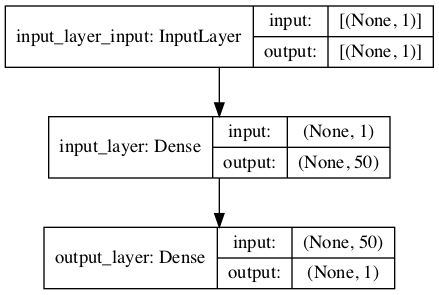

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###Visualize our model's predictions!!!!

To visualize predictions,it's a good idea to plot them against the round truth labels.

Often you see this in the form of y_test or y_true versus y_pred (ground truth versus your model)


In [32]:
#Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 69.585754],
       [ 73.55872 ],
       [ 77.53168 ],
       [ 81.50465 ],
       [ 85.47761 ],
       [ 89.450584],
       [ 93.423546],
       [ 97.39652 ],
       [101.36947 ],
       [105.34244 ]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

if you're going to reuse some kind of functionality in the future create a function for it!


In [34]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_pred):

    """Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
#Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label= "Training_data")

#Plot testing data in green
    plt.scatter(test_data, test_labels, c= "g", label = "Testing data")

#Plot model's predictions in red
    plt.scatter(test_data,predictions, c="r", label= "Predictions")
#Show Legend
    plt.legend()

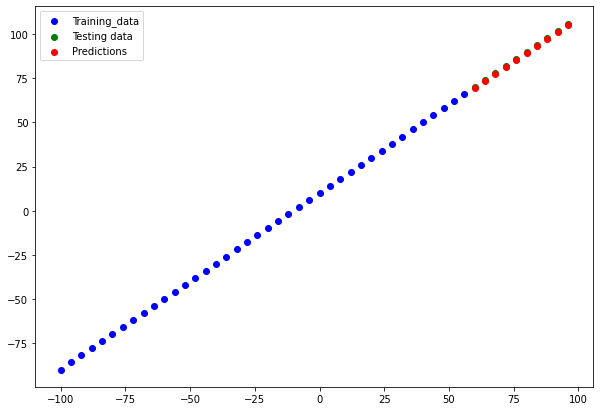

In [35]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE = mean absolute error, "ON average, how wrong are each of my models predictions.

* MSE - mean square error, "square the average errors"


In [36]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 0.5359 - mae: 0.5359


[0.535906195640564, 0.535906195640564]

In [37]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred=  tf.squeeze(y_pred))

In [38]:

mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.53590316>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.585754,  73.55872 ,  77.53168 ,  81.50465 ,  85.47761 ,
        89.450584,  93.423546,  97.39652 , 101.36947 , 105.34244 ],
      dtype=float32)>

In [40]:

#Calculate the mean Square Error

mse = tf.metrics.mean_squared_error(y_true= y_test, y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.29322195>

In [41]:
#Make functions to reuse MAE and MSE

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true= y_true,
                                          y_pred = tf.squeeze(y_pred))
def mse (y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

### Running experiments to improve our models

1. Get more data - get more examples for your model to train on (more oppurtunities to learn patterns or relationships between features and labels.)

2. Make your model larger (using a complex model) - this might coe in the form of more layers or hidden units  in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Lets do 3 experiments

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build model_1**


In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/10

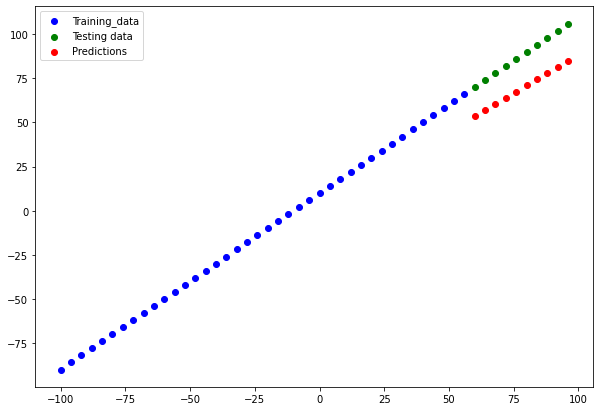

In [43]:
#Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [44]:
#Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build** `model_2`
* 2 dense layers, trained for 100 epochs.

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2 Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 989us/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 11.8819 - mae: 11.8819

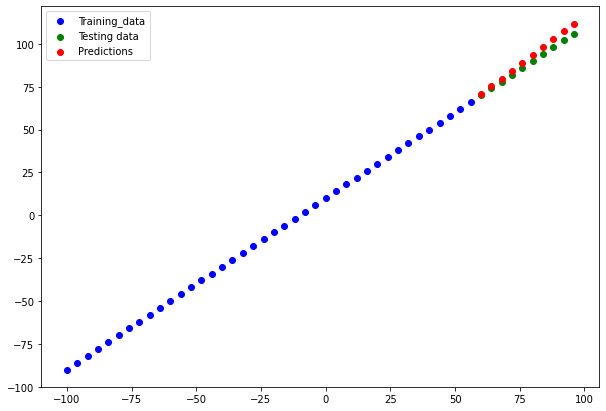

In [46]:
#Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [47]:

#Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build** `model_3`
* 2 dense layers, trained for 500 epochs.

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2 Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.8819 - mae: 11.8819

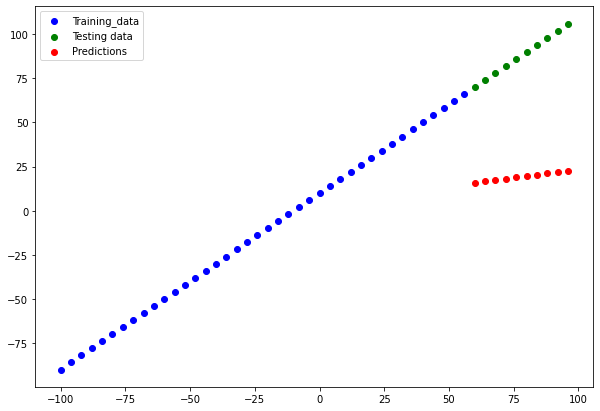

In [49]:

#Make and plot predictions for model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [50]:
#Calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Calculate model_3 evaluation metrics

We've run a few experiments let's compare the results.

**NOTE START EXPERIMENTS SMALL AND THEN INCREASE COMPLEXITY WHEN NEEDED**

In [51]:
#Let's compare out model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_2.numpy(), mse_2.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,3.196940,13.070127


In [52]:
#Model 2 performed the best...

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

One really good habit in mahine learning modelling is to track the results of your experiments.

And wqhen doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resources:** As you build more models, you'll want to look into using:
*TensorBoard - a compnent of the TensorFlow library to help track modelling experiments( we'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our models
Saving our models allows us to use them outside of Google Colab (or whatever they were trained)
such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format




In [53]:
#Save model using the SavedModel format
model_2.save("best_model_SavedModel__format")

2021-07-11 08:57:45.383666: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model_SavedModel__format/assets


In [54]:
#Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

Loading in a saved model



In [58]:
#Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/Udemy_TeachingMachine/best_model_SavedModel__format/")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Comapre model_2 predictions with SavedModel format predictions

model_2_preds = model_2.predict(X_test)
loadedpb_2_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds,  loadedpb_2_preds

(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

In [61]:
model_2_preds ==loadedpb_2_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [63]:
##Load in model using .h5 file
loaded_h5_file = tf.keras.models.load_model("/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/Udemy_TeachingMachine/best_model_HDF5_format.h5")
loaded_h5_file.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Check to see if .h5 predictions match model_2

loaded_h5_model_preds = loaded_h5_file.predict(X_test)
model_2_preds, loaded_h5_model_preds, model_2_preds == loaded_h5_model_preds

(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

A larger example will be in next notebook...



